# Decision Tree Classifier

In [9]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', '..', 'src')

sys.path.append(src_dir)


import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from utils.plotDecisionRegions import plot_decision_regions

### Impurity indexes for gini, entropy and misclassification error

Text(0, 0.5, 'Impurity Index')

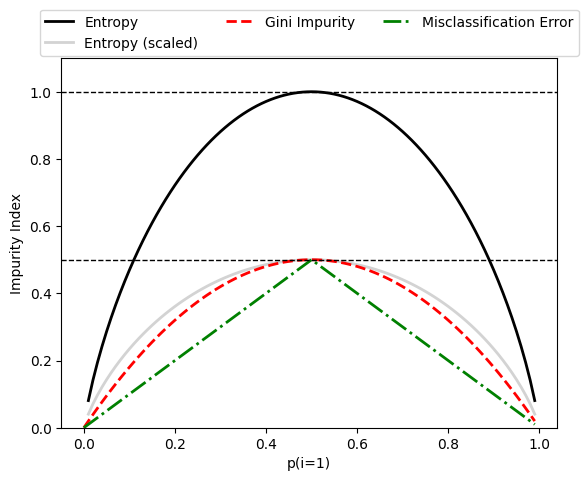

In [3]:
def gini(p):
  return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
  return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
  return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'], ['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

As we can see in the different graphs, misclassification error is not very sensative to different probablity ranges. This can cause situations in which vastly different data splits can have the same purity index. As we can see, scaled entropy and gini have similar purity indexes, which shows that chosing between both is not very important in comparison to doing something like tree pruning.

### Building a Decision Tree

In [6]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Grab second and third features (petal length and petal width)
y = iris.target

print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 30% test data & 70% training data
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/classification/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


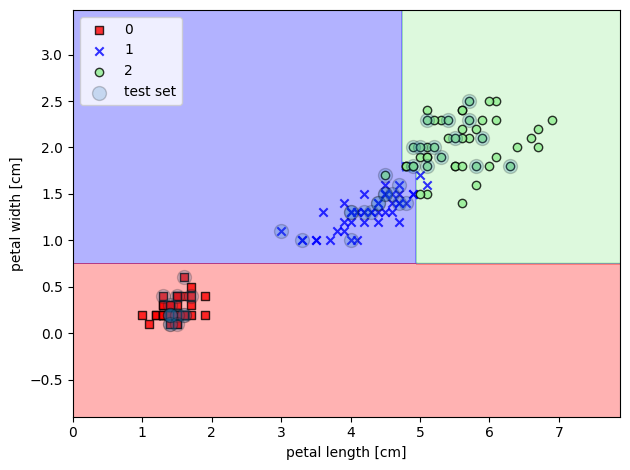

In [7]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Decision Tree Random Forests

/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/classification/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


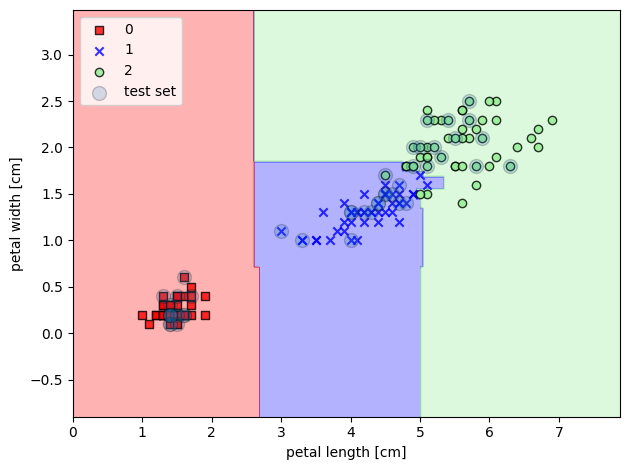

In [10]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Learnings
- TODO: Touch on general learnings of how splits are chosen, since the book doesn't go into this
- TODO: Touch on how purity comes into play when chosing from different splits
- TODO: Touch on how to avoid overfitting with tree pruning
- TODO: Touch on why decision trees do not need feature scaling
- TODO: Touch on what is going on when using ensambles like random forests, boostrapping and how that affects performance, majority vote, etc. How random forest do not need pruning or hyperparameter tuning since the ensamble is robust to noise and overfitting.